# Data Exploration

This notebook is used to explore & visualize our dataset.

In [2]:
import numpy as np # Linear Alg
import pandas as pd # CSV file I/O & data processing

# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings 

from sklearn import preprocessing
from matplotlib import style

warnings.filterwarnings("ignore")
style.use('ggplot')

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)

from subprocess import check_output

In [3]:
input_dir = '../../input'

In [8]:
currencies = {}

currencies['bitcoin'] = pd.read_csv('{}/bitcoin_price.csv'.format(input_dir), parse_dates=['Date'])
currencies['bitconnect'] = pd.read_csv('{}/bitconnect_price.csv'.format(input_dir), parse_dates=['Date'])
currencies['dash'] = pd.read_csv('{}/dash_price.csv'.format(input_dir), parse_dates=['Date'])
currencies['ethereum_classic'] = pd.read_csv('{}/ethereum_classic_price.csv'.format(input_dir), parse_dates=['Date'])

currencies['ethereum'] = pd.read_csv('{}/ethereum_price.csv'.format(input_dir), parse_dates=['Date'])
currencies['iota'] = pd.read_csv('{}/iota_price.csv'.format(input_dir), parse_dates=['Date'])
currencies['litecoin'] = pd.read_csv('{}/litecoin_price.csv'.format(input_dir), parse_dates=['Date'])
currencies['monero'] = pd.read_csv('{}/monero_price.csv'.format(input_dir), parse_dates=['Date'])
currencies['nem'] = pd.read_csv('{}/nem_price.csv'.format(input_dir), parse_dates=['Date'])
currencies['neo'] = pd.read_csv('{}/neo_price.csv'.format(input_dir), parse_dates=['Date'])
currencies['numeraire'] = pd.read_csv('{}/numeraire_price.csv'.format(input_dir), parse_dates=['Date'])
currencies['omisego'] = pd.read_csv('{}/omisego_price.csv'.format(input_dir), parse_dates=['Date'])
currencies['qtum'] = pd.read_csv('{}/qtum_price.csv'.format(input_dir), parse_dates=['Date'])
currencies['ripple'] = pd.read_csv('{}/ripple_price.csv'.format(input_dir), parse_dates=['Date'])
currencies['stratis'] = pd.read_csv('{}/stratis_price.csv'.format(input_dir), parse_dates=['Date'])
currencies['waves'] = pd.read_csv('{}/waves_price.csv'.format(input_dir), parse_dates=['Date'])

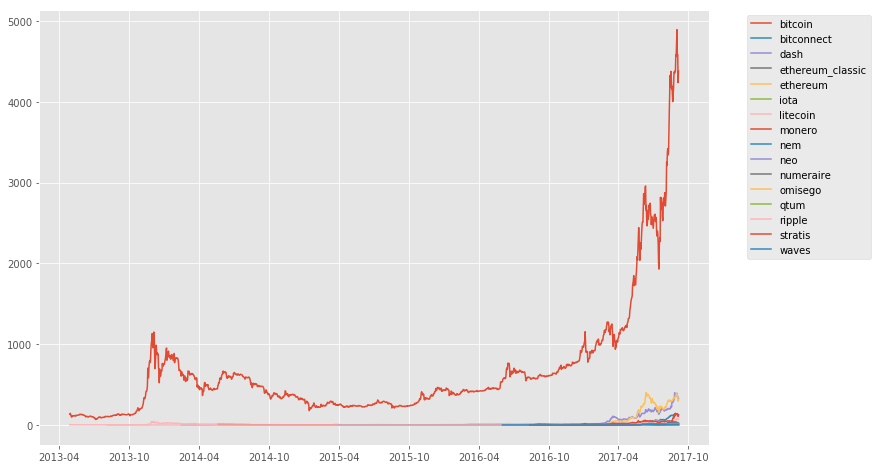

In [65]:
for c in currencies:
    plt.plot(currencies[c].index, currencies[c]['Close'], label=c)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

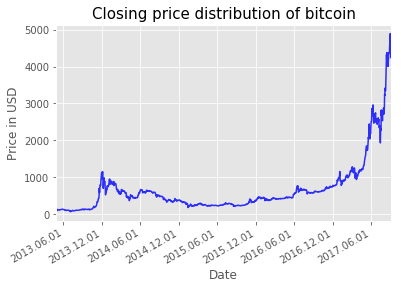

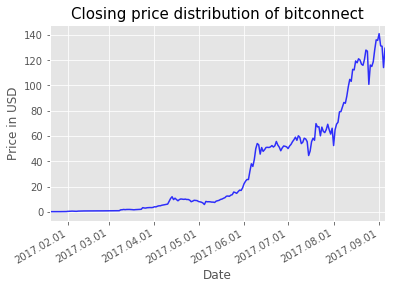

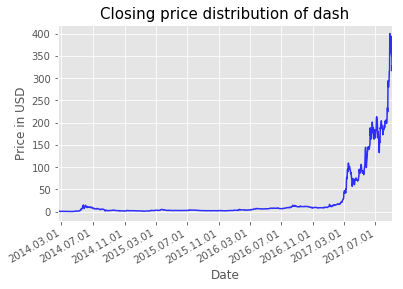

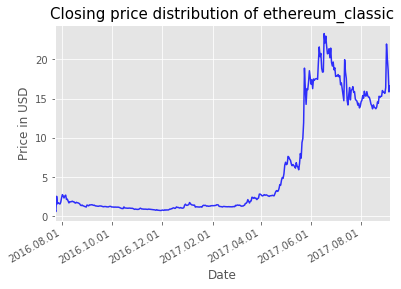

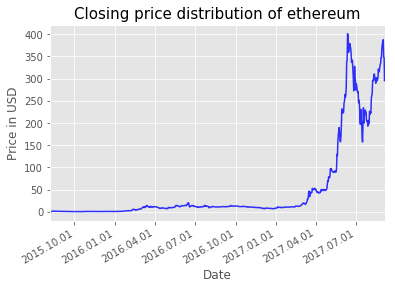

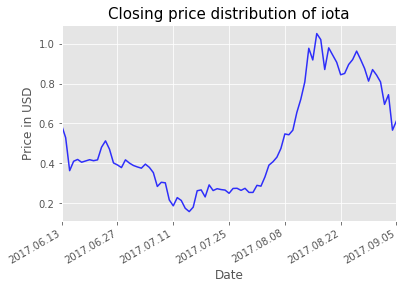

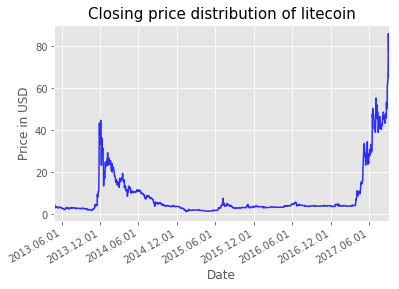

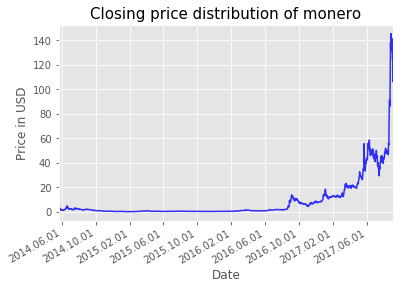

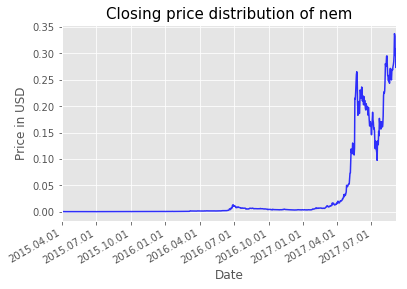

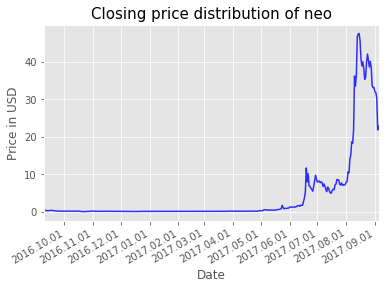

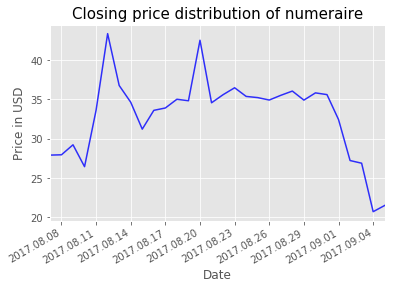

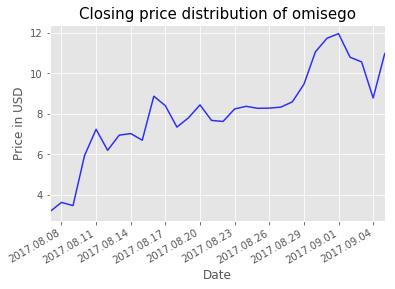

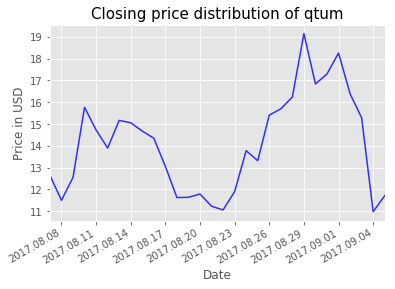

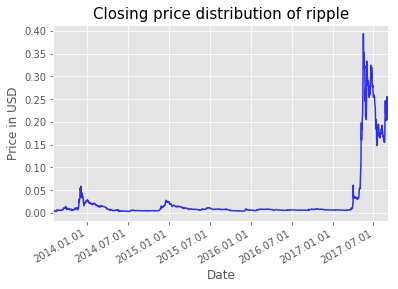

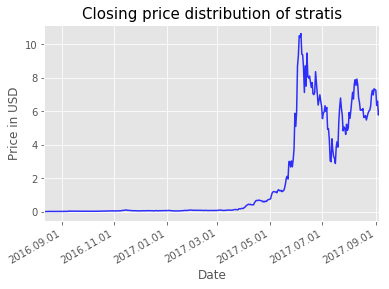

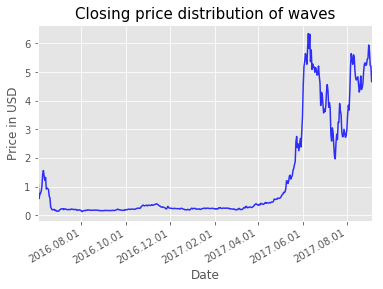

In [11]:
for c in currencies:
    df = pd.DataFrame(currencies[c])
    df = df[['Date' , 'Close']]
    
    df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x)) 
    fig, ax = plt.subplots(figsize=(6,4))
    sns.tsplot(df.Close.values, time=df.Date_mpl.values, alpha=0.8, color='b', ax=ax)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
    fig.autofmt_xdate()
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price in USD', fontsize=12)
    title_str = "Closing price distribution of " + c
    plt.title(title_str, fontsize=15)
    plt.show()

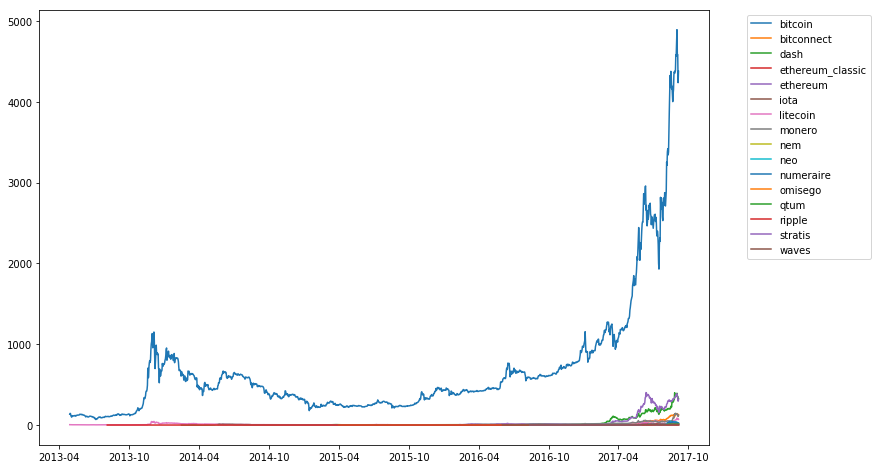

In [7]:
# Un-normalized data
for c in currencies:
    plt.plot(currencies[c].index, currencies[c]['Close'], label=c)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [4]:
currencies = {}

currencies['bitcoin'] = pd.read_csv('{}/bitcoin_price.csv'.format(input_dir), parse_dates=['Date'], index_col=0)
currencies['bitconnect'] = pd.read_csv('{}/bitconnect_price.csv'.format(input_dir), parse_dates=['Date'], index_col=0)
currencies['dash'] = pd.read_csv('{}/dash_price.csv'.format(input_dir), parse_dates=['Date'], index_col=0)
currencies['ethereum_classic'] = pd.read_csv('{}/ethereum_classic_price.csv'.format(input_dir), parse_dates=['Date'], index_col=0)

currencies['ethereum'] = pd.read_csv('{}/ethereum_price.csv'.format(input_dir), parse_dates=['Date'], index_col=0)
currencies['iota'] = pd.read_csv('{}/iota_price.csv'.format(input_dir), parse_dates=['Date'], index_col=0)
currencies['litecoin'] = pd.read_csv('{}/litecoin_price.csv'.format(input_dir), parse_dates=['Date'], index_col=0)
currencies['monero'] = pd.read_csv('{}/monero_price.csv'.format(input_dir), parse_dates=['Date'], index_col=0)
currencies['nem'] = pd.read_csv('{}/nem_price.csv'.format(input_dir), parse_dates=['Date'], index_col=0)
currencies['neo'] = pd.read_csv('{}/neo_price.csv'.format(input_dir), parse_dates=['Date'], index_col=0)
currencies['numeraire'] = pd.read_csv('{}/numeraire_price.csv'.format(input_dir), parse_dates=['Date'], index_col=0)
currencies['omisego'] = pd.read_csv('{}/omisego_price.csv'.format(input_dir), parse_dates=['Date'], index_col=0)
currencies['qtum'] = pd.read_csv('{}/qtum_price.csv'.format(input_dir), parse_dates=['Date'], index_col=0)
currencies['ripple'] = pd.read_csv('{}/ripple_price.csv'.format(input_dir), parse_dates=['Date'], index_col=0)
currencies['stratis'] = pd.read_csv('{}/stratis_price.csv'.format(input_dir), parse_dates=['Date'], index_col=0)
currencies['waves'] = pd.read_csv('{}/waves_price.csv'.format(input_dir), parse_dates=['Date'], index_col=0)

# currencies['bitcoin_cash'] = pd.read_csv('{}/bitcoin_cash_price.csv'.format(input_dir), parse_dates=['Date'], index_col=0)
# currencies['ethereum_data'] = pd.read_csv('{}/ethereum_dataset.csv'.format(input_dir), parse_dates=['Date'], index_col=0)
# currencies['bitcoin_data'] = pd.read_csv('{}/bitcoin_dataset.csv'.format(input_dir), parse_dates=['Date'], index_col=0)

print(len(currencies))

16


In [49]:
ohlc = ['Open', 'High', 'Low', 'Close']
    
currencies_ohlc = {}
for i in currencies:
    currencies_ohlc[i] = currencies[i].drop(["Volume", "Market Cap"], axis=1)

currencies_ohlc['bitcoin'].head()

,Open,High,Low,Close
Date,,,,
2017-09-05,4228.29,4427.84,3998.11,4376.53
2017-09-04,4591.63,4591.63,4108.40,4236.31
2017-09-03,4585.27,4714.08,4417.59,4582.96
2017-09-02,4901.42,4975.04,4469.24,4578.77
2017-09-01,4701.76,4892.01,4678.53,4892.01


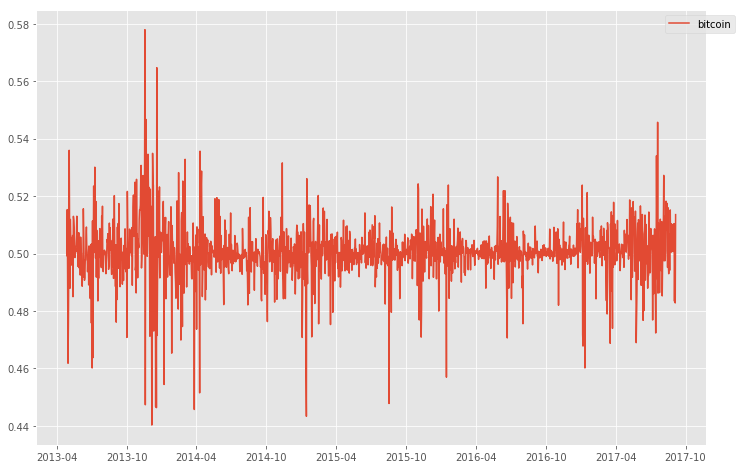

In [69]:
normalized_currencies = {}
for i in currencies_ohlc:
    normalized_currencies[i] = preprocessing.normalize(currencies_ohlc[i], norm='l2')

# normalized_df = {}
# for i in normalized_currencies:
#     normalized_currencies[]
# df = pd.DataFrame(normalized_currencies['bitcoin'], index=currencies_ohlc['bitcoin'].index)
# df.head()

# plt.plot(df[3], label='bitcoin')
# plt.legend(bbox_to_anchor=(1.05, 1))
# plt.show()
# bitcoin_close = normalized_currencies['bitcoin']['Close']
# bitcoin_close.head()
# bitcoin_normalized = preprocessing.normalize(bitcoin_close[1], norm='l2')
# bitcoin_normalized
# normalized_currencies['bitcoin']['Close'].head()
# for i in normalized_currencies:
#     for feat in ohlc:
#         normalized_currencies[i][feat] = preprocessing.normalize(currencies_ohlc[i][feat], norm='l2')
    
# normalized_currencies['bitcoin']["Close"].head()

In [ ]:

for c in normalized_currencies:
    plt.plot(normalized_currencies[c].index, currencies[c]['Close'], label=c)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()